# Bessel and related functions

Series expansions are used in a variety of circumstances:
- When we need a tractable approximation to some ugly equation
- To transform between equivalent ways of looking at a problem (e.g. time domain vs frequency domain)
- When they are (part of) a solution to a particular class of differential equation

For approximations, there is an important divide between getting the best fit *near a point* (e.g. Taylor series) and getting the best fit *over an interval*. This notebook deals with one example of the latter; there is a separate notebook for Taylor expansions and others for Fourier, Legendre, etc.

## Fitting over an interval

What is the best (tractable) series approximating my function across some range of values? What matters is an overall best fit (e.g. least-squares deviation) across the range, and we can't tolerate wild divergences as with the Taylor series.

There are various series which are useful in different contexts, but a common property is that the terms are *orthogonal* over some interval $[-L,L]$. If $f(t)$ is a real-valued function their *inner product* is defined as

$$ \langle f(m t),f(n t) \rangle   \colon =\int _{-L}^L f(m t) f(n t) \,  dt $$

For orthogonal functions, this is non-zero if $m=n$ and zero if $m \ne n$, i.e. 

$$\langle f(m t),f(n t) \rangle = a \delta_{mn}$$

where $\delta$ is the Kronecker delta.  If $a = 1$ the functions are said to be orthonormal.

## Bessel and Neumann Functions

These are a type of decaying oscillation, with all the functions mutually orthogonal over the range $[-1,1]$. [Boas](#refs) comments in section 12.12 that "there are whole books on Bessel functions", but explaining them at less than book-length seems more challenging.

They are solutions to the differential equation

$$ x^2 y'' + x y' + (x^2 - \alpha^2)y = 0 $$

where $\alpha$ can be an arbitrary complex constant. The most important cases are when $\alpha$ is integer or half-integer.

With integer $\alpha$ they tend to crop up in the sort of problems which naturally use cylindrical coordinates, such as protoplanetary disks and spiral galaxies. These cases are also known as cylindrical harmonics because they appear in the solution to Laplace's equation $\nabla^2 \phi = 0$ in cyclindrical coordinates.

Spherical Bessel functions with half-integer $\alpha$ appear in the solution to the Helmholtz equation $\nabla^2A + k^2A = 0$ in spherical coordinates.

### Variations

There are several related but distinct functions, and inconsistencies in names and symbols make things appear even more complex. This seems to be the general pattern (based on Wikipedia, with fingers crossed). Unfortunately this also demonstrates that Jupyter is really bad at table formatting.

| Type | ........ First kind .....| ...... Second kind .....|
|------|------------------------|---------------------------|
| Bessel | $\mathcal{J}_{\alpha}$ | $Y_{\alpha}$ or $N_n$ |
| Modified Bessel | $\mathcal{I}_{\alpha}$ | $\mathcal{K}_{\alpha}$ |
| Hankel | $\mathcal{H}_{\alpha}^{(1)} = \mathcal{J}_{\alpha} + i \mathcal{Y}_{\alpha}$ | $\mathcal{H}_{\alpha}^{(2)} = \mathcal{J}_{\alpha} - i \mathcal{Y}_{\alpha}$ | 
| Spherical Bessel | $\mathcal{j}_n$ | $y_n$ or $n_n$ |
| Spherical Hankel | $\mathcal{h}_n^{(1)} = \mathcal{h}_n + i \mathcal{y}_n$ | $\mathcal{h}_n^{(1)} = \mathcal{h}_n - i \mathcal{y}_n$ | 

There are many relevant Python functions in the `scipy.special` library, so be sure to check the documentation before you try to use them.

### Bessel functions of the first kind

These are finite at $x = 0$ for integer or positive $\alpha$. The generator function is

$$ \mathcal{J}_{\alpha}(x) = \sum_{m=0}^{\infty} \frac{(-1)^m}{m!\ \Gamma(m+\alpha+1)} \left( \frac{x}{2} \right)^{2m+\alpha} $$

Clearly it is easier to leave the computer to deal with this.

Let's plot the first few Bessel functions of the first kind. I lifted the code from [here](https://stackoverflow.com/questions/16778845/python-plotting-bessel-functions-of-the-first-kind-with-a-float-argument).

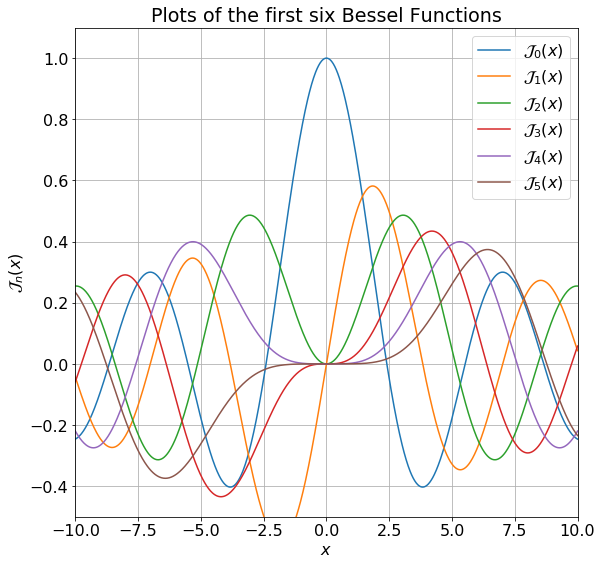

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from math import factorial

from ipywidgets import interact, interactive, fixed, interact_manual, Layout
import ipywidgets as w

plt.rcParams.update({'font.size': 16})

import scipy.special as sp

xlims = (-10, 10)
x = np.linspace(xlims[0], xlims[1], 1000)

plt.figure(figsize=(9, 9))
for v in range(0, 6):
    plt.plot(x, sp.jv(v, x))

plt.xlim(xlims)
plt.ylim((-0.5, 1.1))
plt.legend(('$\mathcal{J}_0(x)$', '$\mathcal{J}_1(x)$', '$\mathcal{J}_2(x)$',
           '$\mathcal{J}_3(x)$', '$\mathcal{J}_4(x)$', '$\mathcal{J}_5(x)$'),
           loc = 0)
plt.xlabel('$x$')
plt.ylabel('$\mathcal{J}_n(x)$')
plt.title('Plots of the first six Bessel Functions')                                
plt.grid(True)

<a id='neumann'></a>

### Bessel functions of the second kind

These are variously known as Neumann functions or Weber functions. They diverge at $x=0$.



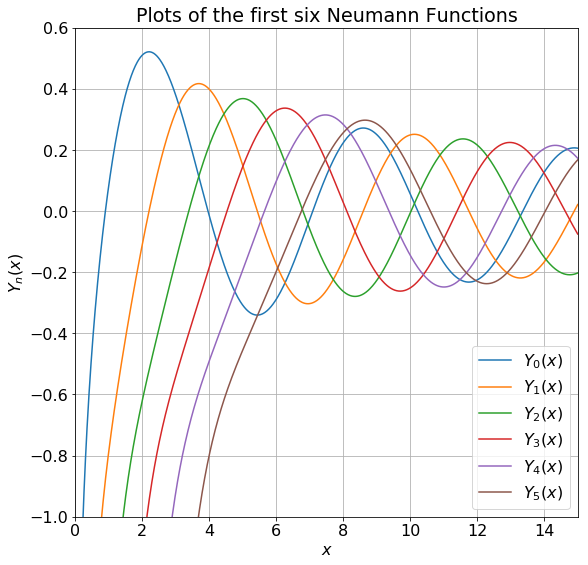

In [11]:
xlims = (0, 15)
x = np.linspace(xlims[0], xlims[1], 1000)

plt.figure(figsize=(9, 9))
for v in range(0, 6):
    plt.plot(x, sp.yn(v, x))

plt.xlim(xlims)
plt.ylim((-1, 0.6))
plt.legend(('$Y_0(x)$', '$Y_1(x)$', '$Y_2(x)$', '$Y_3(x)$', 
            '$Y_4(x)$', '$Y_5(x)$'), loc = 0)
plt.xlabel('$x$')
plt.ylabel('$Y_n(x)$')
plt.title('Plots of the first six Neumann Functions')                                
plt.grid(True)

<a id='refs'></a>

## References

Boas, "Mathematical methods in the physical sciences"